<a href="https://colab.research.google.com/github/Alexandra-SR/PI_2/blob/master/PI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=77d8f18b1125ca8f2e0c3dbf1025aaf9a564288d13e0d5c4dbfe67481511a74e
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
!mkdir known
!wget https://elintranews.com/wp-content/uploads/2020/07/rosal%C3%ADa-1.jpg -O known/rosalia.jpg
!wget https://mui.today/__export/1582405251029/sites/mui/img/2020/01/25/20-02-2019-dua-lipa.jpg_1898065519.jpg -O known/dualipa.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/9/91/Gigi_Hadid._2015.jpg -O known/gigi.jpg

mkdir: cannot create directory ‘known’: File exists
--2020-09-18 03:57:13--  https://elintranews.com/wp-content/uploads/2020/07/rosal%C3%ADa-1.jpg
Resolving elintranews.com (elintranews.com)... 192.0.78.194, 192.0.78.129
Connecting to elintranews.com (elintranews.com)|192.0.78.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81999 (80K) [image/jpeg]
Saving to: ‘known/rosalia.jpg’

known/rosalia.jpg   100%[===================>]  80.08K  --.-KB/s    in 0.1s    

2020-09-18 03:57:14 (572 KB/s) - ‘known/rosalia.jpg’ saved [81999/81999]

--2020-09-18 03:57:14--  https://mui.today/__export/1582405251029/sites/mui/img/2020/01/25/20-02-2019-dua-lipa.jpg_1898065519.jpg
Resolving mui.today (mui.today)... 13.33.242.81, 13.33.242.41, 13.33.242.97, ...
Connecting to mui.today (mui.today)|13.33.242.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111521 (109K) [image/jpeg]
Saving to: ‘known/dualipa.jpg’

known/dualipa.jpg   100%[==============

Processing 2.jpg
[0.69378611 0.49227211 0.77794506]


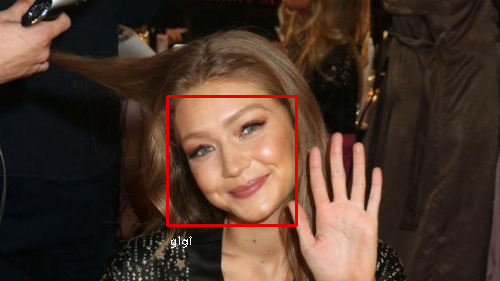

Processing 3.jpg
[0.45077018 0.68589618 0.80377053]


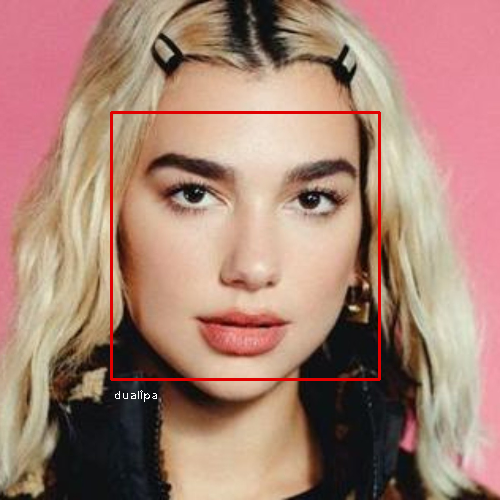

Processing dualipa.jpg
[0.45077018 0.68589618 0.80377053]


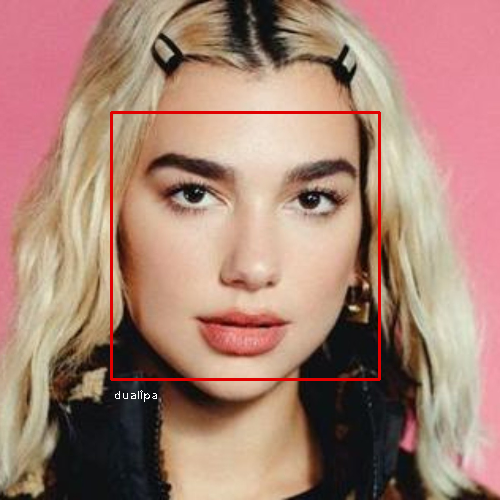

Processing 4.jpg
[0.779743   0.80476856 0.50710034]


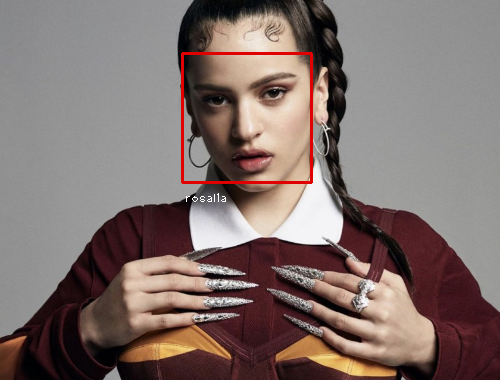

Processing greicy.jpg
[0.65997551 0.84821089 0.79595776]
Processing gigi.jpg
[0.69378611 0.49227211 0.77794506]


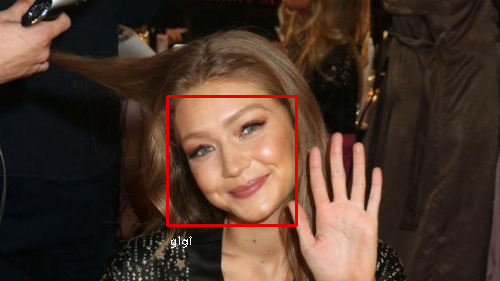

Processing rosalia.jpg
[0.779743   0.80476856 0.50710034]


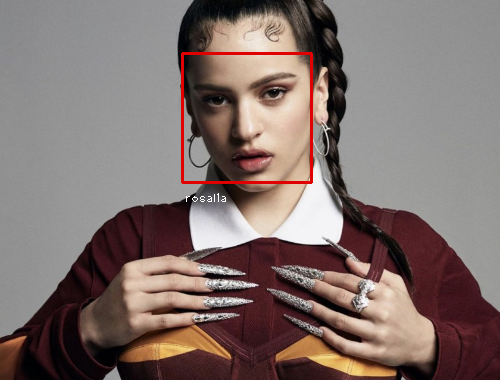

Processing 1.jpg
[0.65997551 0.84821089 0.79595776]


In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(h*ratio)
  return cv2.resize(img,(width, height))

known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
  print("Processing",file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc)
  print(face_recognition.face_distance(known_encodings, img_enc))


  for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0,0,225), 2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 0.8, (255,255,255), 1)
      cv2_imshow(img)
  #print(results)
  

